# Geopandas를 활용한 공간데이터 처리

## 01. 튜토리얼

사용될 라이브러리 설치 및 버전 확인

In [265]:
import pandas as pd
import geopandas as gpd
import matplotlib
import os

print(pd.__version__)
print(gpd.__version__)
print(matplotlib.__version__)

2.1.1
0.14.0
3.8.0


기본 데이터 불러오기

In [266]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries.head()

/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_72691/1493347040.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [267]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_72691/122148680.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


세계지도 시각화

/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


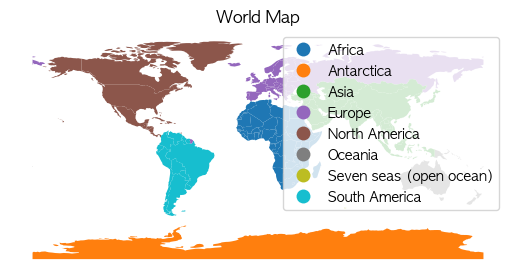

In [268]:
import matplotlib.pyplot as plt

ax = countries.plot(column='continent', legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()

plt.show()

1인당 GDP 계산 및 시각화

/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


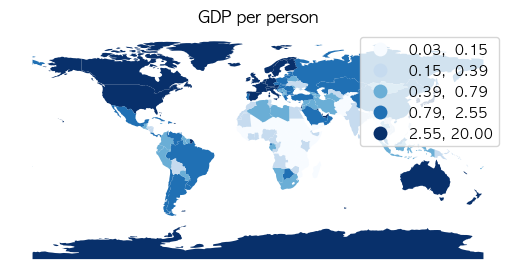

In [269]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap='Blues', k=5)
ax.set_axis_off()
ax.set_title("GDP per person")
plt.show()

백지도 및 주요 도시 시각화

/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/geopandas/plotting.py:494: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/geopandas/plotting.py:494: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/Users/kjs/.pyenv/versions/3.10.9/envs/gpd/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


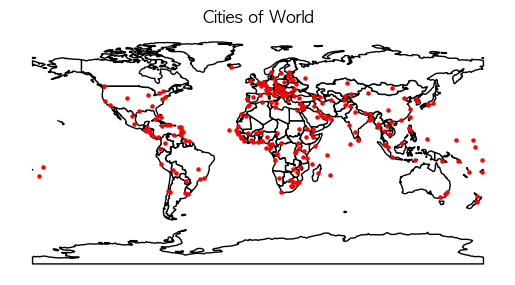

In [270]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("Cities of World")

plt.show()

한국, 서울, 중심점 시각화

/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_72691/3333161730.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  korea_centroid = korea_geometry.centroid.squeeze()


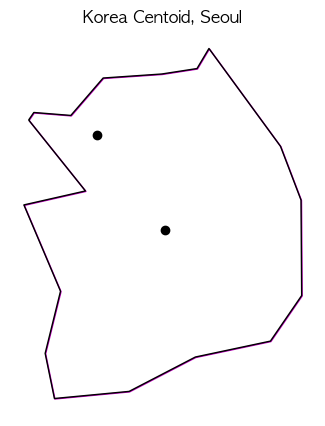

In [271]:
korea_geometry = countries[countries.name == "South Korea"].geometry
korea_boundary = korea_geometry.boundary.squeeze()
korea_centroid = korea_geometry.centroid.squeeze()
seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()

base = countries[countries.name == "South Korea"].plot(
    figsize=(5, 5), color="w", edgecolor="m")
ax = gpd.GeoSeries([korea_boundary, korea_centroid, seoul]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("Korea Centoid, Seoul")
ax.set_axis_off()
plt.show()

## 2. 데이터 불러오기 및 저장

라이브러리 로드 및 경로 설정

In [272]:
from pathlib import Path

BASE_DIR = Path().resolve().parent
print(BASE_DIR)

ssg_path = BASE_DIR.joinpath("data", "LARD_ADM_SECT_SGG_대구_02")
ssg_files = os.listdir(ssg_path)
ssg_files

/Users/kjs/Desktop/project/[Tutorial]_geopandas


['LARD_ADM_SECT_SGG_27.dbf',
 'LARD_ADM_SECT_SGG_27.shx',
 'LARD_ADM_SECT_SGG_27.shp',
 'LARD_ADM_SECT_SGG_27.prj']

대구광역시 시군구 데이터 로드

In [333]:
# 행정구역 시군구(S, G, G) 데이터
ssg_fname = [v for v in ssg_files if v.split(".")[-1] == "shp"][0]
sgg = gpd.read_file(os.path.join(ssg_path, ssg_fname), encoding="EUC-KR")
sgg

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,27710,달성군,NaN,27710,117,"MULTIPOLYGON (((1090134.674 1758418.148, 10902..."
1,27290,달서구,NaN,27290,118,"POLYGON ((1092002.026 1764133.847, 1092138.506..."
2,27260,수성구,NaN,27260,119,"POLYGON ((1098629.136 1757517.327, 1098692.133..."
3,27230,북구,NaN,27230,120,"POLYGON ((1100548.326 1776461.558, 1100558.656..."
4,27200,남구,NaN,27200,121,"POLYGON ((1097464.450 1762903.002, 1097774.420..."
5,27170,서구,NaN,27170,122,"POLYGON ((1097653.400 1765932.443, 1097584.742..."
6,27140,동구,NaN,27140,123,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
7,27110,중구,NaN,27110,124,"POLYGON ((1099266.034 1764845.475, 1099328.023..."
8,27200,남구,1.0,27200,264,"POLYGON ((1255885.463 2127798.832, 1255906.225..."


대구광역시 시군구 데이터 시각화

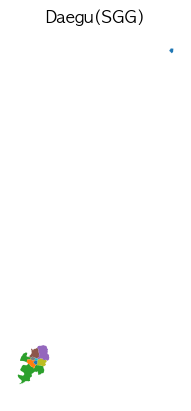

In [334]:
ax = sgg.plot(column="SGG_NM", categorical=True)
ax.set_title("Daegu(SGG)")
ax.set_axis_off()
plt.show()

이상치 제거 후 재 시각화

In [335]:
# 이상치 제거
ssg = sgg.drop([8], axis=0, inplace=True)
sgg

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,27710,달성군,NaN,27710,117,"MULTIPOLYGON (((1090134.674 1758418.148, 10902..."
1,27290,달서구,NaN,27290,118,"POLYGON ((1092002.026 1764133.847, 1092138.506..."
2,27260,수성구,NaN,27260,119,"POLYGON ((1098629.136 1757517.327, 1098692.133..."
3,27230,북구,NaN,27230,120,"POLYGON ((1100548.326 1776461.558, 1100558.656..."
4,27200,남구,NaN,27200,121,"POLYGON ((1097464.450 1762903.002, 1097774.420..."
5,27170,서구,NaN,27170,122,"POLYGON ((1097653.400 1765932.443, 1097584.742..."
6,27140,동구,NaN,27140,123,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
7,27110,중구,NaN,27110,124,"POLYGON ((1099266.034 1764845.475, 1099328.023..."


대구광역시 시군구 데이터 시각화

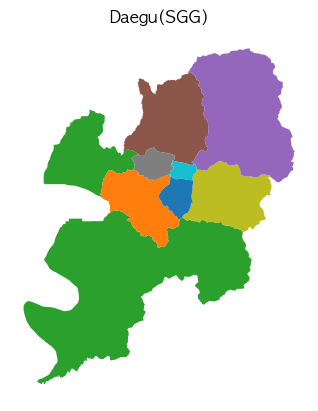

In [336]:
ax = sgg.plot(column="SGG_NM", categorical=True)
ax.set_title("Daegu(SGG)")
ax.set_axis_off()
plt.show()

좌표계 변환 함수 GeoDataFrame.to_crs()

In [276]:
sgg.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [277]:
sgg = sgg.to_crs(epsg=5179)
sgg.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

GeoDataFrame.to_file()

**SHP, Shapefile** : 지리현상에 대한 기하학적 위치, 속성 정보 저장 제공 데이터 포맷 
- 2GB 용량 제한, 용량에 따른 속도 저하, 다중 파일 형식, 열 머리글 제한

**GPKG , OGC GeoPackage**: SQLite DB 컨테이너 구성 지리정보 데이터 포맷
- 높은 호환성, 공간 인덱싱의 고속화, 단일 파일관리, 열 머리글 제한 X


In [278]:
save_path = BASE_DIR.joinpath("data", "대구시_시군구_5179.gpkg")
sgg.to_file(save_path, driver="GPKG", encoding="UTF-8")

**실습**

- 대구시 읍면동(법정동) 파일로드
- 시각화 및 좌표계 지정(set_crs() 활용 및 좌표계 ESPG:5186)
- 좌표계 변환(좌표계 ESPG:5179)
- GPKG 형식으로 저장
- 파일명 : 대구시_법정동_5179

In [279]:
umd_path = BASE_DIR.joinpath("data", "LSMD_ADM_SECT_UMD_대구")
umd_files = os.listdir(umd_path)
umd_files

['LSMD_ADM_SECT_UMD_27_202309.shx',
 'LSMD_ADM_SECT_UMD_27_202309.cst',
 'LSMD_ADM_SECT_UMD_27_202309.shp',
 'LSMD_ADM_SECT_UMD_27_202309.dbf',
 'LSMD_ADM_SECT_UMD_27_202309.fix',
 'LSMD_ADM_SECT_UMD_27_202309.prj']

In [280]:
# 행정구역 읍면동(U, M, D) 데이터
umd_fname = [v for v in umd_files if v.split(".")[-1] == "shp"][0]
umd = gpd.read_file(os.path.join(umd_path, umd_fname), encoding="EUC-KR")
umd

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
0,27110101,27110,동인동1가,534,"POLYGON ((345103.860 365233.108, 345094.303 36..."
1,27110102,27110,동인동2가,535,"POLYGON ((344560.459 364948.036, 344574.310 36..."
2,27110103,27110,동인동3가,536,"POLYGON ((345418.388 365374.582, 345463.199 36..."
3,27110104,27110,동인동4가,537,"POLYGON ((345797.583 364746.716, 345841.459 36..."
4,27110105,27110,삼덕동1가,538,"POLYGON ((344095.651 364613.872, 344134.616 36..."
...,...,...,...,...,...
207,27720330,27720,부계면,418,"POLYGON ((350184.871 393212.197, 350305.933 39..."
208,27720340,27720,우보면,419,"POLYGON ((349483.230 403774.201, 349475.930 40..."
209,27720350,27720,의흥면,420,"POLYGON ((358107.133 401985.455, 358168.018 40..."
210,27720360,27720,산성면,421,"POLYGON ((354838.718 396117.170, 354854.936 39..."


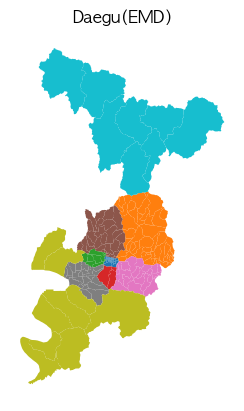

In [281]:
ax = umd.plot(column="COL_ADM_SE", categorical=True)
ax.set_title("Daegu(EMD)")
ax.set_axis_off()
plt.show()

In [282]:
# umd = umd.set_crs(epsg=5186)
umd = umd.to_crs(epsg=5179)

save_path = BASE_DIR.joinpath("data", "대구시_법정동_5179.gpkg")
umd.to_file(save_path, driver="GPKG", encoding="UTF-8")

## 3. 좌표변환

CSV 파일 불러오기

In [283]:
fname = "대구광역시_전기차 충전기 구축 현황_20230531.csv"
csv_path = BASE_DIR.joinpath("data", fname)
df = pd.read_csv(csv_path, encoding="CP949")
df.head()

,충전소명,주소,ID,충전기 형태,충전기 용량
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW


In [284]:
fname = "대구광역시_시내버스 정류소 위치정보_20230731.csv"
csv_path = BASE_DIR.joinpath("data", fname)
df = pd.read_csv(csv_path, encoding="CP949")
df.head()

,정류소아이디,모바일아이디,정류소명,영문명,시도,구군,동,경도,위도,경유노선수,경유노선
0,7051001500,2354,대구공공시설관리공단앞,Daegu Public Facilities Corporation,대구광역시,남구,대명10동,128.560335,35.838405,8,306+518+564+600+623+649+651+서구1
1,7051003100,2178,대명역(1번출구),Daemyeong Station,대구광역시,남구,대명10동,128.565153,35.839405,8,306+518+564+600+623+649+651+서구1
2,7051003300,20031,대명초등학교건너,Daemyeong Elementary School,대구광역시,남구,대명10동,128.568599,35.839578,8,306+518+564+600+623+649+651+서구1
3,7051003500,2175,KT남대구지사건너1,KT Namdaegu District Office,대구광역시,남구,대명10동,128.572613,35.839436,7,306+518+564+623+649+651+서구1
4,7051003700,2174,안지랑네거리2,Anjirang (4) Junction,대구광역시,남구,대명10동,128.575223,35.839256,9,306+410-1+518+564+623+649+651+달서4+서구1


geometry 생성 및 GeoDataFrame 변환

In [285]:
geometry = gpd.points_from_xy(df['경도'], df['위도'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)
gdf.head()

,정류소아이디,모바일아이디,정류소명,영문명,시도,구군,동,경도,위도,경유노선수,경유노선,geometry
0,7051001500,2354,대구공공시설관리공단앞,Daegu Public Facilities Corporation,대구광역시,남구,대명10동,128.560335,35.838405,8,306+518+564+600+623+649+651+서구1,POINT (128.56033 35.83841)
1,7051003100,2178,대명역(1번출구),Daemyeong Station,대구광역시,남구,대명10동,128.565153,35.839405,8,306+518+564+600+623+649+651+서구1,POINT (128.56515 35.83940)
2,7051003300,20031,대명초등학교건너,Daemyeong Elementary School,대구광역시,남구,대명10동,128.568599,35.839578,8,306+518+564+600+623+649+651+서구1,POINT (128.56860 35.83958)
3,7051003500,2175,KT남대구지사건너1,KT Namdaegu District Office,대구광역시,남구,대명10동,128.572613,35.839436,7,306+518+564+623+649+651+서구1,POINT (128.57261 35.83944)
4,7051003700,2174,안지랑네거리2,Anjirang (4) Junction,대구광역시,남구,대명10동,128.575223,35.839256,9,306+410-1+518+564+623+649+651+달서4+서구1,POINT (128.57522 35.83926)


GPKG 변환 및 저장

In [286]:
save_path = BASE_DIR.joinpath("data")
fname = "대구광역시_시내버스 정류소 위치정보_20230731.gpkg"
gdf.to_file(os.path.join(save_path, fname), driver="GPKG", encoding="UTF-8")

# 5-1 Geocoding

필요 모듈 로드 및 API 호출 세팅

In [287]:
import time, requests, json
from shapely.geometry import Point

In [288]:
# Vworld API 호출문
url = "https://api.vworld.kr/req/address?"
params = {
    "service": "address",
    "request": "getcoord",
    "crs": "epsg:4326",
    "address": "판교로 242",
    "format": "json",
    "type": "road",
    "key": "6FD01BEE-B2C2-374E-B7DC-CCD1DE600CFB",
    "refine": "true"
}

In [289]:
# Vworld API 호출문
url = "https://api.vworld.kr/req/address?"
params = {
    "service": "address",
    "request": "getcoord",
    "crs": "epsg:4326",
    "address": "검단로 255",
    "format": "json",
    "type": "road",
    "key": "6FD01BEE-B2C2-374E-B7DC-CCD1DE600CFB",
    "refine": "true"
}

API 호출 및 결과 확인

In [290]:
req = requests.get(url, params=params)
print("status : ", req.status_code)

data = req.json()
data

status :  200


{'response': {'service': {'name': 'address',
   'version': '2.0',
   'operation': 'getcoord',
   'time': '28(ms)'},
  'status': 'OK',
  'input': {'type': 'road', 'address': '검단로 255'},
  'refined': {'text': '대구광역시 북구 검단로 255 (검단동,민들레아파트)',
   'structure': {'level0': '대한민국',
    'level1': '대구광역시',
    'level2': '북구',
    'level3': '검단동',
    'level4L': '검단로',
    'level4LC': '',
    'level4A': '검단동',
    'level4AC': '2723068000',
    'level5': '255',
    'detail': '민들레아파트'}},
  'result': {'crs': 'EPSG:4326',
   'point': {'x': '128.628241948', 'y': '35.916148737'}}}}

데이터 파싱

In [291]:
data["response"]["result"]

{'crs': 'EPSG:4326', 'point': {'x': '128.628241948', 'y': '35.916148737'}}

In [292]:
data["response"]["refined"]

{'text': '대구광역시 북구 검단로 255 (검단동,민들레아파트)',
 'structure': {'level0': '대한민국',
  'level1': '대구광역시',
  'level2': '북구',
  'level3': '검단동',
  'level4L': '검단로',
  'level4LC': '',
  'level4A': '검단동',
  'level4AC': '2723068000',
  'level5': '255',
  'detail': '민들레아파트'}}

In [293]:
data["response"]["result"]["point"]

{'x': '128.628241948', 'y': '35.916148737'}

In [294]:
data["response"]["result"]["point"]["x"]

'128.628241948'

In [295]:
data["response"]["result"]["point"]["y"]

'35.916148737'

# 5-2. Geocoding - 실습

데이터 불러오기

In [296]:
fname = "대구광역시_전기차 충전기 구축 현황_20230531.csv"
csv_path = BASE_DIR.joinpath("data", fname)
df = pd.read_csv(csv_path, encoding="CP949")
df.head()

,충전소명,주소,ID,충전기 형태,충전기 용량
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW


geocoder 함수 생성

In [297]:
import numpy as np

def geocoder(address):
    x, y = np.NaN, np.NaN
    url = "https://api.vworld.kr/req/address?"
    params = {
        "service": "address",
        "request": "getcoord",
        "crs" : "epsg:4326",
        "address": str(address),
        "format": "json",
        "type": "road",
        "key": "6FD01BEE-B2C2-374E-B7DC-CCD1DE600CFB",
        "refine": "false"
    }
    res = requests.get(url, params=params)
    if res.status_code == 200:
        data = res.json
        try:
            x = data["response"]["result"]["point"]["x"]
            y = data["response"]["result"]["point"]["y"]
        except:
            pass
    return pd.Series([x, y])

In [298]:
t = "대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1)"
geocoder(t)

0   NaN
1   NaN
dtype: float64

In [299]:
df[["x", "y"]] = df["주소"].apply(geocoder)
df.head()

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,NaN,NaN
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,NaN,NaN
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,NaN,NaN
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,NaN,NaN
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,NaN,NaN


geocoding 실패 주소 파일로 변환

In [300]:
fail = df[df["x"].isna()]
fail.head()

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,NaN,NaN
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,NaN,NaN
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,NaN,NaN
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,NaN,NaN
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,NaN,NaN


In [301]:
print(save_path)
fail.to_csv(os.path.join(save_path, "fail.csv"), index=False)

/Users/kjs/Desktop/project/[Tutorial]_geopandas/data


다운로드 및 data 폴더로 이동 후 데이터 불러오기

In [302]:
data_dir = BASE_DIR.joinpath("data")
fail = pd.read_csv(os.path.join(data_dir, "fail - fail.csv"))
fail.head()

,충전소명,주소,Latitude,Longitude,ID,충전기 형태,충전기 용량,x,y
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),35.919199,128.640025,1,DC차데모+AC3상+DC콤보,50kW,NaN,NaN
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),35.802585,128.622956,1,AC완속,7kW,NaN,NaN
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),35.971134,128.725650,1,AC완속,7kW,NaN,NaN
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),35.971134,128.725650,2,AC완속,7kW,NaN,NaN
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),35.971134,128.725650,3,AC완속,7kW,NaN,NaN


열 삭제 및 이름 변경

In [303]:
fail = fail.drop(["x", "y"], axis=1)
fail = fail.rename(columns={"Latitude": "y", "Longitude": "x"},)
fail.head()

,충전소명,주소,y,x,ID,충전기 형태,충전기 용량
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),35.919199,128.640025,1,DC차데모+AC3상+DC콤보,50kW
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),35.802585,128.622956,1,AC완속,7kW
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),35.971134,128.725650,1,AC완속,7kW
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),35.971134,128.725650,2,AC완속,7kW
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),35.971134,128.725650,3,AC완속,7kW


Vworld Geocoding 성공 결과물과 결합

In [304]:
df = df[df["x"].notna()]
result = pd.concat([df, fail], axis=0)
result.head()

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,128.640025,35.919199
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,128.622956,35.802585
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,128.725650,35.971134
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,128.725650,35.971134
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,128.725650,35.971134


Geometry 생성 및 좌표계 설정

In [305]:
geometry = gpd.points_from_xy(result['x'], result['y'])
gdf = gpd.GeoDataFrame(result, geometry=geometry, crs=4326)
gdf.head()

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y,geometry
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,128.640025,35.919199,POINT (128.64002 35.91920)
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,128.622956,35.802585,POINT (128.62296 35.80259)
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,128.725650,35.971134,POINT (128.72565 35.97113)
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,128.725650,35.971134,POINT (128.72565 35.97113)
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,128.725650,35.971134,POINT (128.72565 35.97113)


GPKG 형태로 저장

In [306]:
fname = "대구광역시_전기차 충전기 구축 현황_20230531.gpkg"
gdf.to_file(os.path.join(save_path, fname), driver="GPKG", encoding="UTF=8")

# 6. 위치기반 결합

모듈 및 데이터 가져오기

In [307]:
data = gpd.read_file(os.path.join(save_path, "대구광역시_전기차 충전기 구축 현황_20230531.gpkg"))
sgg = gpd.read_file(os.path.join(save_path, "대구시_시군구_5179.gpkg"))
bjd = gpd.read_file(os.path.join(save_path, "대구시_법정동_5179.gpkg"))
data.head(5)

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y,geometry
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,128.640025,35.919199,POINT (128.64002 35.91920)
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,128.622956,35.802585,POINT (128.62296 35.80259)
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,128.725650,35.971134,POINT (128.72565 35.97113)
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,128.725650,35.971134,POINT (128.72565 35.97113)
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,128.725650,35.971134,POINT (128.72565 35.97113)


데이터 시각화

In [308]:
# Matplotlib 한글 폰트 깨짐 현상 해결
from hangle_font import set_hangle_font

set_hangle_font()

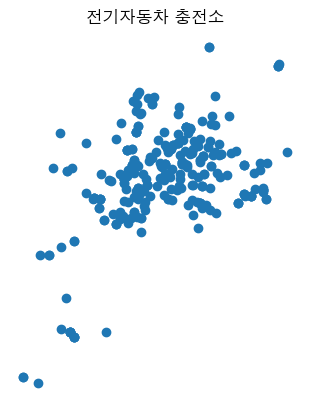

In [309]:
ax = data.plot()
ax.set_title("전기자동차 충전소")
ax.set_axis_off()
plt.show()

데이터 시각화(충전기 용량별)

<function matplotlib.pyplot.show(close=None, block=None)>

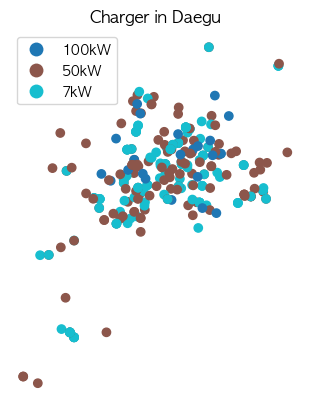

In [310]:
ax = data.plot(column="충전기 용량", legend=True, categorical=True)
ax.set_title("Charger in Daegu")
ax.set_axis_off()
plt.show

데이터 시각화(시군구 + 충전소)

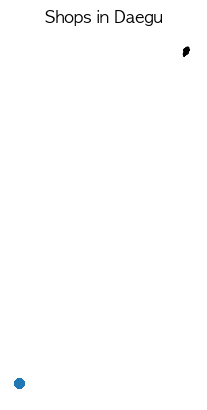

In [311]:
base = sgg.plot(color="white", edgecolor="k")
ax = data.plot(ax=base)
ax.set_title("Shops in Daegu")
ax.set_axis_off()
plt.show()

**위와 같은 결과가 나온 이유**
- 시군구 데이터와 충전소 데이터의 좌표계가 맞지 않아 서로 이격됨

좌표계 확인

In [312]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [313]:
sgg.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- [north]: Northing (metre)
- [east]: Easting (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [314]:
data = data.to_crs(epsg=5179)
data.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

재 시각화

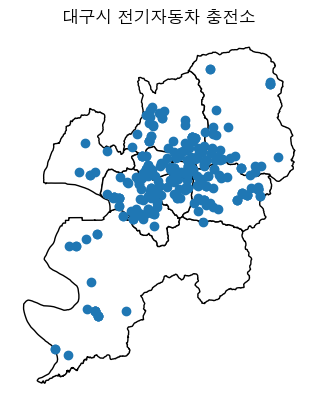

In [315]:
base = sgg.plot(color='white', edgecolor="k")
ax = data.plot(ax=base)
ax.set_title("대구시 전기자동차 충전소")
ax.set_axis_off()
plt.show()

sgg ID 부여

In [318]:
sgg["id"] = sgg.index
sgg

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,id
0,27710,달성군,None,27710,117,"MULTIPOLYGON (((1090134.674 1758418.148, 10902...",0
1,27290,달서구,None,27290,118,"POLYGON ((1092002.026 1764133.847, 1092138.506...",1
2,27260,수성구,None,27260,119,"POLYGON ((1098629.136 1757517.327, 1098692.133...",2
3,27230,북구,None,27230,120,"POLYGON ((1100548.326 1776461.558, 1100558.656...",3
4,27200,남구,None,27200,121,"POLYGON ((1097464.450 1762903.002, 1097774.420...",4
5,27170,서구,None,27170,122,"POLYGON ((1097653.400 1765932.443, 1097584.742...",5
6,27140,동구,None,27140,123,"POLYGON ((1107777.593 1780522.269, 1107845.409...",6
7,27110,중구,None,27110,124,"POLYGON ((1099266.034 1764845.475, 1099328.023...",7


위치기반 결합

In [320]:
joined = gpd.sjoin(data, sgg[["id", "geometry"]], how="left", predicate="intersects")
joined.head()

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y,geometry,index_right,id
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,128.640025,35.919199,POINT (1102854.579 1769771.861),6.0,6.0
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,128.622956,35.802585,POINT (1101463.068 1756819.334),0.0,0.0
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,128.725650,35.971134,POINT (1110507.826 1775626.160),6.0,6.0
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,128.725650,35.971134,POINT (1110507.826 1775626.160),6.0,6.0
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,128.725650,35.971134,POINT (1110507.826 1775626.160),6.0,6.0


ID별 개수 카운트

In [321]:
joined["count"] = 1
grouped = joined.groupby("id")[["count"]].count()
grouped = grouped.reset_index()
grouped

,id,count
0,0.0,30
1,1.0,58
2,2.0,47
3,3.0,55
4,4.0,14
5,5.0,22
6,6.0,41
7,7.0,18


병합

In [322]:
result = pd.merge(sgg, grouped, on="id", how="left")
result

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,id,count
0,27710,달성군,None,27710,117,"MULTIPOLYGON (((1090134.674 1758418.148, 10902...",0,30
1,27290,달서구,None,27290,118,"POLYGON ((1092002.026 1764133.847, 1092138.506...",1,58
2,27260,수성구,None,27260,119,"POLYGON ((1098629.136 1757517.327, 1098692.133...",2,47
3,27230,북구,None,27230,120,"POLYGON ((1100548.326 1776461.558, 1100558.656...",3,55
4,27200,남구,None,27200,121,"POLYGON ((1097464.450 1762903.002, 1097774.420...",4,14
5,27170,서구,None,27170,122,"POLYGON ((1097653.400 1765932.443, 1097584.742...",5,22
6,27140,동구,None,27140,123,"POLYGON ((1107777.593 1780522.269, 1107845.409...",6,41
7,27110,중구,None,27110,124,"POLYGON ((1099266.034 1764845.475, 1099328.023...",7,18


결과 시각화

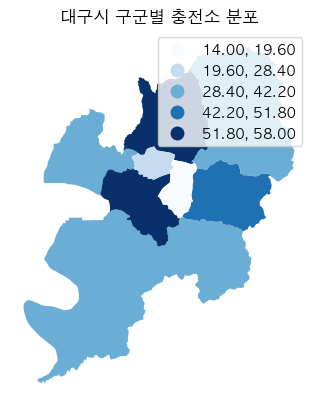

In [323]:
ax = result.plot(column="count", legend=True, scheme="quantiles", cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("대구시 구군별 충전소 분포")
plt.show()

**실습**
- 대구시 읍면동(법정동) 파일 불러오기
- 읍면동(법정동)별 충전소 수 카운트
- 충전소 수 기준으로 시각화

In [324]:
bjd["id"] = bjd.index
bjd

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry,id
0,27110101,27110,동인동1가,534,"POLYGON ((1099906.269 1764700.534, 1099896.616...",0
1,27110102,27110,동인동2가,535,"POLYGON ((1099361.709 1764418.397, 1099375.534...",1
2,27110103,27110,동인동3가,536,"POLYGON ((1100221.347 1764840.322, 1100266.053...",2
3,27110104,27110,동인동4가,537,"POLYGON ((1100597.124 1764210.863, 1100640.315...",3
4,27110105,27110,삼덕동1가,538,"POLYGON ((1098895.448 1764086.793, 1098934.353...",4
...,...,...,...,...,...,...
207,27720330,27720,부계면,418,"POLYGON ((1105127.967 1792638.120, 1105248.139...",207
208,27720340,27720,우보면,419,"POLYGON ((1104481.109 1803197.883, 1104473.689...",208
209,27720350,27720,의흥면,420,"POLYGON ((1113090.973 1801365.681, 1113151.144...",209
210,27720360,27720,산성면,421,"POLYGON ((1109794.169 1795517.527, 1109810.047...",210


In [325]:
joined = gpd.sjoin(data, bjd[["id", "geometry"]], how="left", predicate="intersects")
joined.head()

,충전소명,주소,ID,충전기 형태,충전기 용량,x,y,geometry,index_right,id
0,DTC섬유박물관,대구광역시 동구 팔공로 227DTC섬유박물관(봉무동 1560-1),1,DC차데모+AC3상+DC콤보,50kW,128.640025,35.919199,POINT (1102854.579 1769771.861),61.0,61.0
1,가창면 행정복지센터,대구광역시 달성군 가창면 가창로 1100가창면행정복지센터(82 가창면사무소),1,AC완속,7kW,128.622956,35.802585,POINT (1101463.068 1756819.334),201.0,201.0
2,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),1,AC완속,7kW,128.725650,35.971134,POINT (1110507.826 1775626.160),89.0,89.0
3,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),2,AC완속,7kW,128.725650,35.971134,POINT (1110507.826 1775626.160),89.0,89.0
4,갓바위공영3주차장,대구광역시 동구 갓바위로 227갓바위공영3주차장(진인동 123-74 갓바위공영3주차장),3,AC완속,7kW,128.725650,35.971134,POINT (1110507.826 1775626.160),89.0,89.0


In [326]:
joined["count"] = 1
grouped = joined.groupby("id")[["count"]].count()
grouped = grouped.reset_index()
grouped

,id,count
0,0.0,3
1,1.0,4
2,3.0,1
3,6.0,1
4,53.0,5
...,...,...
88,199.0,3
89,200.0,1
90,201.0,1
91,202.0,1


In [327]:
result = pd.merge(bjd, grouped, on="id", how="left")
result

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry,id,count
0,27110101,27110,동인동1가,534,"POLYGON ((1099906.269 1764700.534, 1099896.616...",0,3.0
1,27110102,27110,동인동2가,535,"POLYGON ((1099361.709 1764418.397, 1099375.534...",1,4.0
2,27110103,27110,동인동3가,536,"POLYGON ((1100221.347 1764840.322, 1100266.053...",2,NaN
3,27110104,27110,동인동4가,537,"POLYGON ((1100597.124 1764210.863, 1100640.315...",3,1.0
4,27110105,27110,삼덕동1가,538,"POLYGON ((1098895.448 1764086.793, 1098934.353...",4,NaN
...,...,...,...,...,...,...,...
207,27720330,27720,부계면,418,"POLYGON ((1105127.967 1792638.120, 1105248.139...",207,NaN
208,27720340,27720,우보면,419,"POLYGON ((1104481.109 1803197.883, 1104473.689...",208,NaN
209,27720350,27720,의흥면,420,"POLYGON ((1113090.973 1801365.681, 1113151.144...",209,NaN
210,27720360,27720,산성면,421,"POLYGON ((1109794.169 1795517.527, 1109810.047...",210,NaN


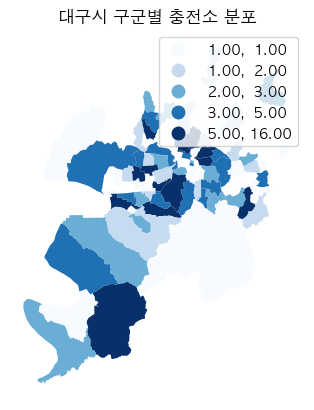

In [328]:
ax = result.plot(column="count", legend=True, scheme="quantiles", cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("대구시 구군별 충전소 분포")
plt.show()